In [1]:
print ("=========================")
print ("Global Feature Extraction")
print ("=========================")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import mahotas
import cv2
import os
import h5py
import glob

# fixed-sizes for image
# fixed_size = tuple((500, 500))
fixed_size = (250,250)

# path to training data
train_path = os.path.abspath("cat/train/")

# no.of.trees for Random Forests
num_trees = 100

# bins for histogram
bins = 8

# train_test_split size
test_size = 0.20

# seed for reproducing same results
seed = 9

Global Feature Extraction


In [2]:
# feature-descriptor-1: Hu Moments
def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

In [3]:
# feature-descriptor-2: Haralick Texture
def fd_haralick(image):
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # compute the haralick texture feature vector
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    # return the result
    return haralick

In [4]:
# feature-descriptor-3: Color Histogram
def fd_histogram(image, mask=None):
    # convert the image to HSV color-space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # compute the color histogram
    hist  = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    # normalize the histogram
    cv2.normalize(hist, hist)
    # return the histogram
    return hist.flatten()

In [5]:
# get the training labels
train_labels = os.listdir(train_path)

# sort the training labels
train_labels.sort()
print(train_labels)

# empty lists to hold feature vectors and labels
global_features = []
labels = []

i, j = 0, 0
k = 0

# num of images per class
images_per_class = 80

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx']


In [6]:
# loop over the training data sub-folders
for training_name in train_labels:
    # join the training data path and each species training folder
    dir = os.path.join(train_path, training_name)

    # get the current training label
    current_label = training_name
    
    print(current_label)
    
    list_images = [f for f in glob.glob(dir + "\*.jpg")]
    list_images = sorted(list_images)
#     print("list image ",list_images[0])
    

    k = 11
    # loop over the images in each sub-folder
#     for x in range(1,images_per_class+1):
    for x in range(1,images_per_class+1):
        # get the image file name
#         file = dir + "\\" + current_label + "_" +str(x) + ".jpg"
        file = list_images[x]
#         print(file)
#         print(os.path.isfile(file))

        # read the image and resize it to a fixed-size
        image = cv2.imread(file)
#         image = cv2.
#         print(image.shape)
#         cv2.imshow("Test", image)
        image = cv2.resize(image, fixed_size)
#         print(image)

        ####################################
        # Global Feature extraction
        ####################################
        fv_hu_moments = fd_hu_moments(image)
        fv_haralick   = fd_haralick(image)
        fv_histogram  = fd_histogram(image)

        ###################################
        # Concatenate global features
        ###################################
        global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])
        
#         print (fv_hu_moments)

        # update the list of labels and feature vectors
        labels.append(current_label)
        global_features.append(global_feature)
#         print(global_feature)

        i += 1
        k += 1
    print ("[STATUS] processed folder: {}".format(current_label))
    j += 1
#     fig.tight_layout()
#     plt.imshow(image)
#     plt.show()

print ("[STATUS] completed Global Feature Extraction...")

Abyssinian
[STATUS] processed folder: Abyssinian
Bengal
[STATUS] processed folder: Bengal
Birman
[STATUS] processed folder: Birman
Bombay
[STATUS] processed folder: Bombay
British_Shorthair
[STATUS] processed folder: British_Shorthair
Maine_Coon
[STATUS] processed folder: Maine_Coon
Persian
[STATUS] processed folder: Persian
Ragdoll
[STATUS] processed folder: Ragdoll
Russian_Blue
[STATUS] processed folder: Russian_Blue
Siamese
[STATUS] processed folder: Siamese
Sphynx
[STATUS] processed folder: Sphynx
[STATUS] completed Global Feature Extraction...


In [7]:
%%time
# get the overall feature vector size
print ("[STATUS] feature vector size {}".format(np.array(global_features).shape))

# get the overall training label size
print ("[STATUS] training Labels {}".format(np.array(labels).shape))

# encode the target labels
targetNames = np.unique(labels)
le = LabelEncoder()
target = le.fit_transform(labels)
print ("[STATUS] training labels encoded...")

# normalize the feature vector in the range (0-1)
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_features)
print ("[STATUS] feature vector normalized...")

print ("[STATUS] target labels: {}".format(target))
print ("[STATUS] target labels shape: {}".format(target.shape))

# save the feature vector using HDF5
h5f_data = h5py.File('output1/data.h5', 'w')
h5f_data.create_dataset('dataset_1', data=np.array(rescaled_features))

h5f_label = h5py.File('output1/labels.h5', 'w')
h5f_label.create_dataset('dataset_1', data=np.array(target))

h5f_data.close()
h5f_label.close()

print ("[STATUS] end of training..")

[STATUS] feature vector size (880, 532)
[STATUS] training Labels (880,)
[STATUS] training labels encoded...
[STATUS] feature vector normalized...
[STATUS] target labels: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3

In [8]:
print ("===================")
print ("Training Classifier")
print ("===================")
import h5py
import numpy as np
import os
import glob2
import cv2
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.externals import joblib

# create all the machine learning models
models = []
models.append(('LR', LogisticRegression(random_state=9)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=9)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, random_state=9)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(random_state=9)))

# variables to hold the results and names
results = []
names = []
scoring = "accuracy"

# import the feature vector and trained labels
h5f_data = h5py.File('output1/data.h5', 'r')
h5f_label = h5py.File('output1/labels.h5', 'r')

global_features_string = h5f_data['dataset_1']
global_labels_string = h5f_label['dataset_1']

global_features = np.array(global_features_string)
global_labels = np.array(global_labels_string)

h5f_data.close()
h5f_label.close()

# verify the shape of the feature vector and labels
print ("[STATUS] features shape: {}".format(global_features.shape))
print ("[STATUS] labels shape: {}".format(global_labels.shape))

print ("[STATUS] training started...")

Training Classifier
[STATUS] features shape: (880, 532)
[STATUS] labels shape: (880,)
[STATUS] training started...


In [ ]:
# split the training and testing data
(trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal) = train_test_split(np.array(global_features),
                                                                                          np.array(global_labels),
                                                                                          test_size=test_size,
                                                                                          random_state=seed)

print ("[STATUS] splitted train and test data...")
print ("Train data  : {}".format(trainDataGlobal.shape))
print ("Test data   : {}".format(testDataGlobal.shape))
print ("Train labels: {}".format(trainLabelsGlobal.shape))
print ("Test labels : {}".format(testLabelsGlobal.shape))

[STATUS] splitted train and test data...
Train data  : (704, 532)
Test data   : (176, 532)
Train labels: (704,)
Test labels : (176,)


LR: 0.232817 (0.055174)
LDA: 0.176097 (0.032363)
KNN: 0.167485 (0.032824)
CART: 0.181811 (0.032225)
RF: 0.325070 (0.057601)
NB: 0.150523 (0.028232)
SVM: 0.066680 (0.023581)


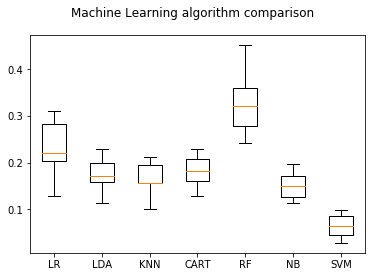

Wall time: 33.5 s


In [ ]:
%%time
# filter all the warnings
import warnings
warnings.filterwarnings('ignore')

# 10-fold cross validation
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, trainDataGlobal, trainLabelsGlobal, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Test Data Using Best Classifier Method
6


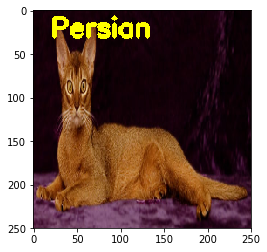

1


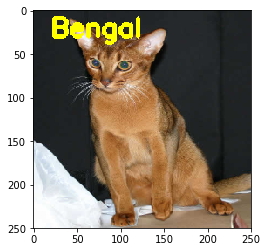

0


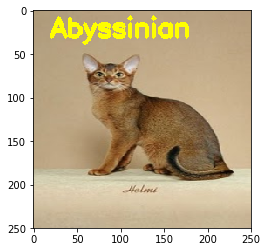

0


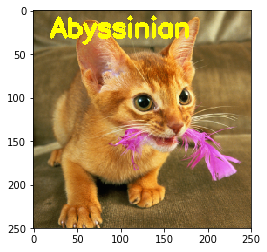

1


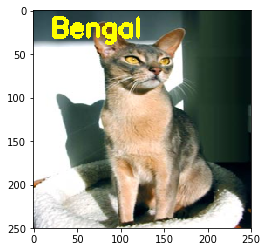

1


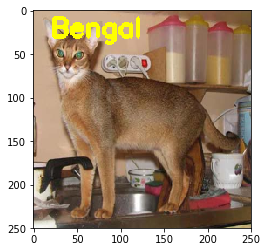

1


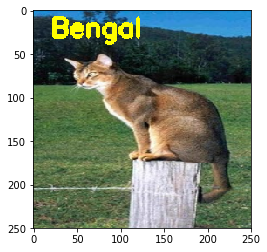

1


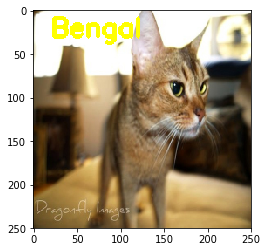

0


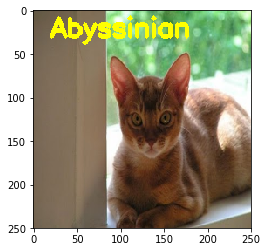

6


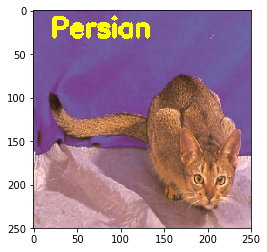

6


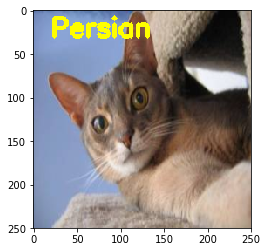

1


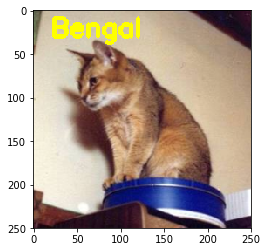

8


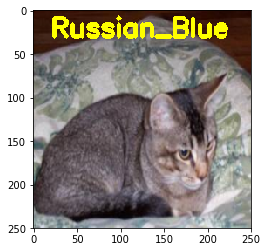

6


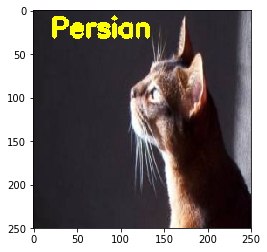

4


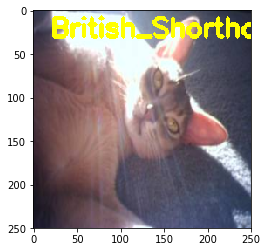

1


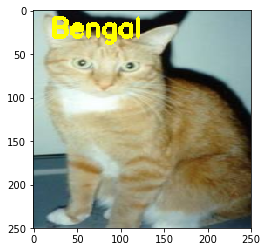

8


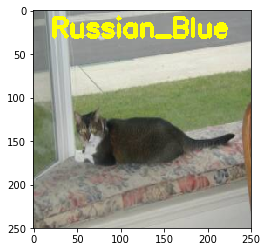

1


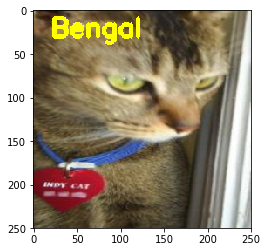

3


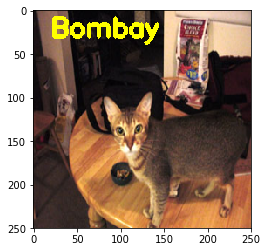

9


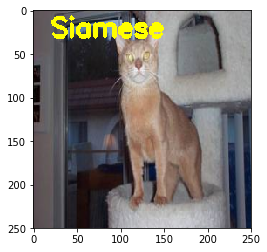

0


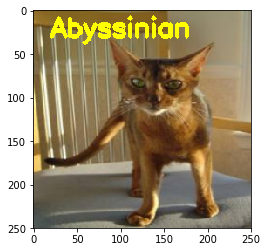

8


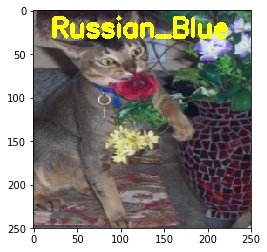

3


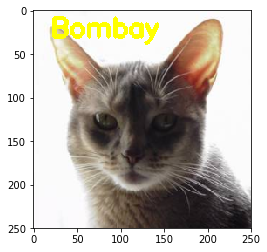

3


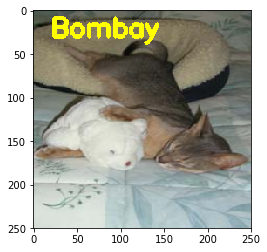

0


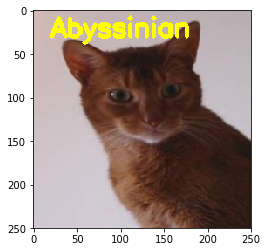

1


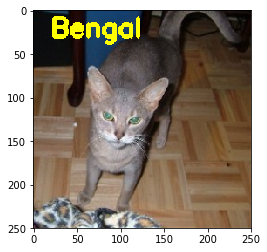

1


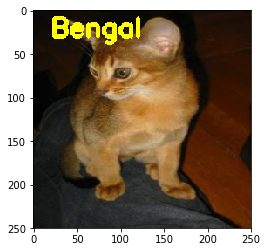

1


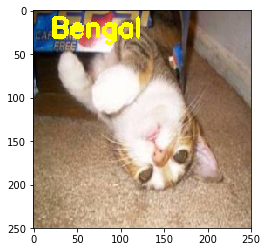

5


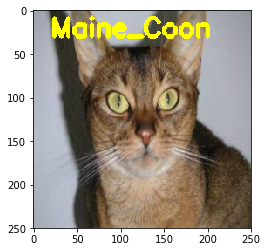

8


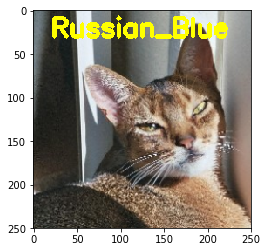

9


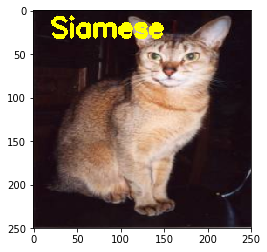

6


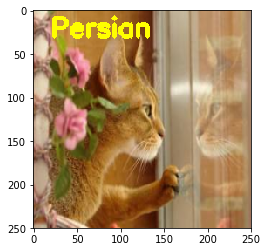

9


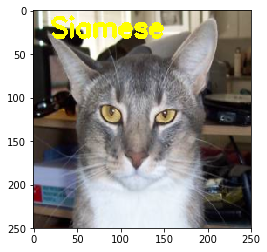

1


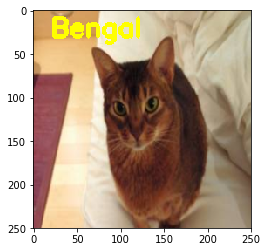

1


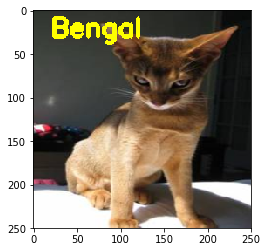

6


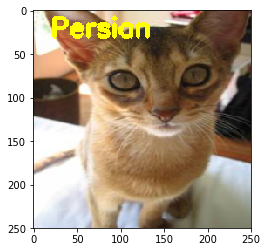

1


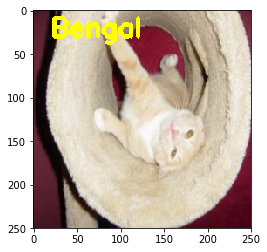

10


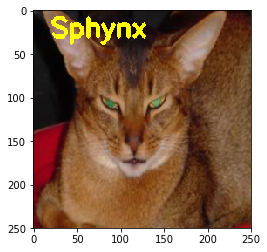

1


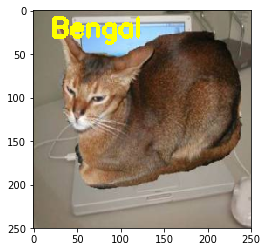

8


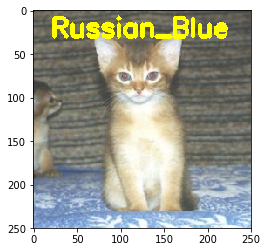

1


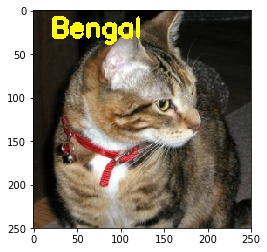

3


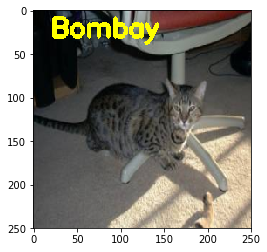

3


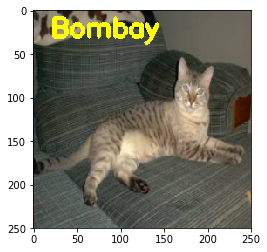

0


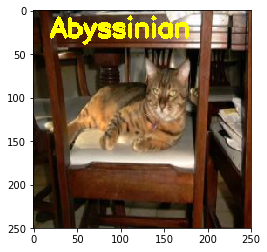

6


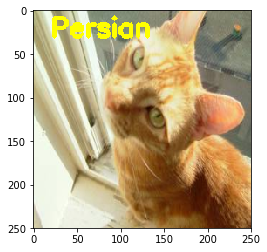

3


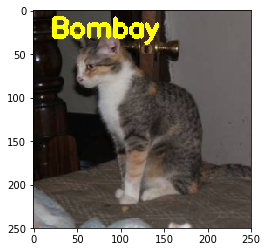

3


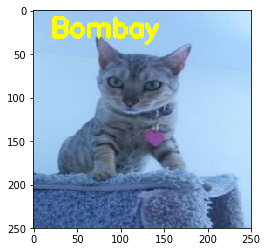

5


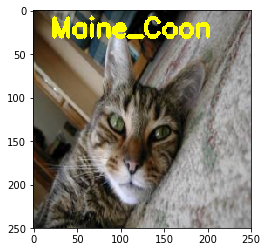

3


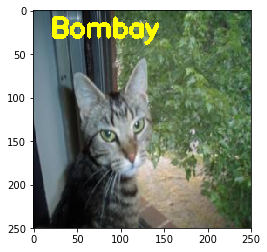

5


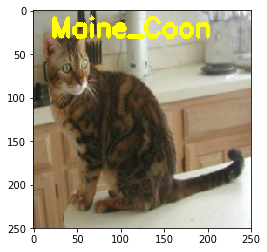

5


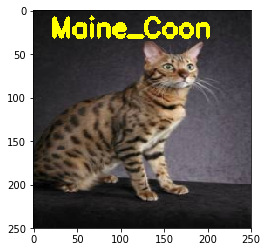

2


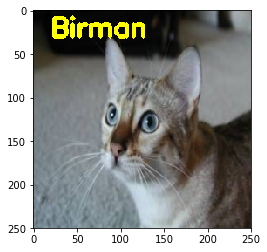

8


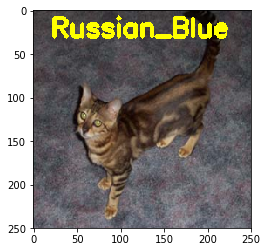

3


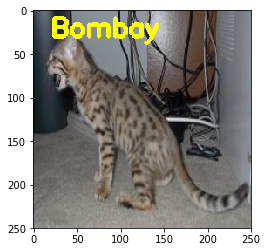

3


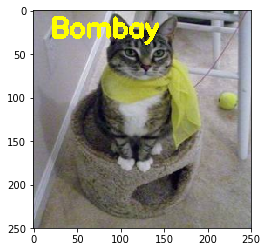

In [ ]:
print ("======================================")
print ("Test Data Using Best Classifier Method")
print ("======================================")
import matplotlib.pyplot as plt
import glob

# create the model - Random Forests
clf  = RandomForestClassifier(n_estimators=100, random_state=9)

# fit the training data to the model
clf.fit(trainDataGlobal, trainLabelsGlobal)

# path to test data
test_path = "cat/test"

# loop through the test images
for file in glob.glob(test_path + "/*.jpg"):
    # read the image
    image = cv2.imread(file)

    # resize the image
    image = cv2.resize(image, fixed_size)

    ####################################
    # Global Feature extraction
    ####################################
    fv_hu_moments = fd_hu_moments(image)
    fv_haralick   = fd_haralick(image)
    fv_histogram  = fd_histogram(image)

    ###################################
    # Concatenate global features
    ###################################
    global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])

    # predict label of test image
    prediction = clf.predict(global_feature.reshape(1,-1))[0]
    print(prediction)

    # show predicted label on image
    cv2.putText(image, train_labels[prediction], (20,30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,255,255), 3)

    # display the output image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()